# **Competition #2 - Final Notebook**

May 6, 2019 

Juliana Hoffmann, Kendall Stopa & Jonathan Uy

# **Business Understanding** - JU

**Framing Analytical Questions**

- Who is likely to default on their credit card?
- Which instances are associates with those most like to default?
- Could other features impact the decision of whether someone would default?
- Which is the best modeling technique to predict someone likely to default?

*What does it mean to default?*
- To default means going 180 days without making a credit card payment. 
- The credit card company writes off the charge as a bad debt expense. 
- The credit card company will sell your account to a collection agency. 

*What are the characteristics of credit card default customers generally?* 
- Barely keeping up with minimum credit card payments
- Growing debt
- Falling credit score
- Customer avoidance of collection agencies 
- Several maxed out credit cards
- Rising interest rates on personal debt
- Credit card payments exceed 15% of gross income 
- Ratio of debt to income

*What more information would be useful IF included within the dataset?*
- Credit score 
- Number of credit cards the individual has 
- Credit card interest rate
- Gross income of customer 


# **Data Table Dictionary** -JU

**Default of Credit Card Clients Data Set**

|Attributes   |  Description  | 
|---|---|
|LIMIT_BAL |X1 -  Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit |
|SEX |X2 - Gender (1 = male; 2 = female) |
|EDUCATION  |X3 - Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).   |   
|MARRIAGE  |X4 - Marital status (1 = married; 2 = single; 3 = others)|  
|AGE |X5 - Age (year)|
|PAY_1 |X6 - the repayment status in September, 2005; Repayment Measurement Scale: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; 3 = payment delay for three months; 4 = payment delay for four months; 5 = payment delay for five months; 6 = payment delay for six months; 7 = payment delay for seven months;  8 = payment delay for eight months; 9 = payment delay for nine months and above|
|PAY_2 |X7 - the repayment status in August, 2005; Repayment Measurement Scale: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; 3 = payment delay for three months; 4 = payment delay for four months; 5 = payment delay for five months; 6 = payment delay for six months; 7 = payment delay for seven months;  8 = payment delay for eight months; 9 = payment delay for nine months and above|
|PAY_3 |X8 - the repayment status in July, 2005; Repayment Measurement Scale: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; 3 = payment delay for three months; 4 = payment delay for four months; 5 = payment delay for five months; 6 = payment delay for six months; 7 = payment delay for seven months;  8 = payment delay for eight months; 9 = payment delay for nine months and above|
|PAY_4 |X9 - the repayment status in June, 2005; Repayment Measurement Scale: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; 3 = payment delay for three months; 4 = payment delay for four months; 5 = payment delay for five months; 6 = payment delay for six months; 7 = payment delay for seven months;  8 = payment delay for eight months; 9 = payment delay for nine months and above|
|PAY_5 |X10 - the repayment status in May, 2005; Repayment Measurement Scale: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; 3 = payment delay for three months; 4 = payment delay for four months; 5 = payment delay for five months; 6 = payment delay for six months; 7 = payment delay for seven months;  8 = payment delay for eight months; 9 = payment delay for nine months and above|
|PAY_6 |X11 - the repayment status in April, 2005; Repayment Measurement Scale: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; 3 = payment delay for three months; 4 = payment delay for four months; 5 = payment delay for five months; 6 = payment delay for six months; 7 = payment delay for seven months;  8 = payment delay for eight months; 9 = payment delay for nine months and above|
|BILL_AMT1  | Amount of bill statement (NT dollar) X12 = amount of bill statement in September, 2005|
|BILL_AMT2 | Amount of bill statement (NT dollar) X13 = amount of bill statement in August, 2005|   
|BILL_AMT3 |Amount of bill statement (NT dollar) X14 = amount of bill statement in July, 2005|  
|BILL_AMT4 |Amount of bill statement (NT dollar) X15 = amount of bill statement in June, 2005|
|BILL_AMT5 |Amount of bill statement (NT dollar) X16 = amount of bill statement in May, 2005|
|BILL_AMT6 | Amount of bill statement (NT dollar) X17 = amount of bill statement in April, 2005|
|PAY_AMT1 | Amount of previous payment (NT dollar) X18 = amount paid in September, 2005|
|PAY_AMT2 | Amount of previous payment (NT dollar) X19 = amount paid in August, 2005|
|PAY_AMT3| Amount of previous payment (NT dollar) X20 = amount paid in July, 2005|
|PAY_AMT4| Amount of previous payment (NT dollar) X21 = amount paid in June, 2005|
|PAY_AMT5 | Amount of previous payment (NT dollar) X22 = amount paid in May, 2005 |
|PAY_AMT6 | Amount of previous payment (NT dollar) X23 = amount paid in April, 2005  | 
|Default Payment Next Month |Y - This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable  |


In [1]:
#importing packages we know we will need upfront
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import iqr
plt.style.use('ggplot')
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [2]:
#importing raw data excel 
df = pd.read_excel ('default.xls', index_col=0, header=0) 
df=df.iloc[1:,:]
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
#readjusting the header
df = df.reset_index(drop=True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# **Descriptive Statistics** - JU

In [4]:
#changing data type from float to int 
df = df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
X1     30000 non-null int64
X2     30000 non-null int64
X3     30000 non-null int64
X4     30000 non-null int64
X5     30000 non-null int64
X6     30000 non-null int64
X7     30000 non-null int64
X8     30000 non-null int64
X9     30000 non-null int64
X10    30000 non-null int64
X11    30000 non-null int64
X12    30000 non-null int64
X13    30000 non-null int64
X14    30000 non-null int64
X15    30000 non-null int64
X16    30000 non-null int64
X17    30000 non-null int64
X18    30000 non-null int64
X19    30000 non-null int64
X20    30000 non-null int64
X21    30000 non-null int64
X22    30000 non-null int64
X23    30000 non-null int64
Y      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [5]:
#descriptive stats for each column
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# **Histogram & Box Plot** -JU

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31ca147a90>,
      dtype=object)

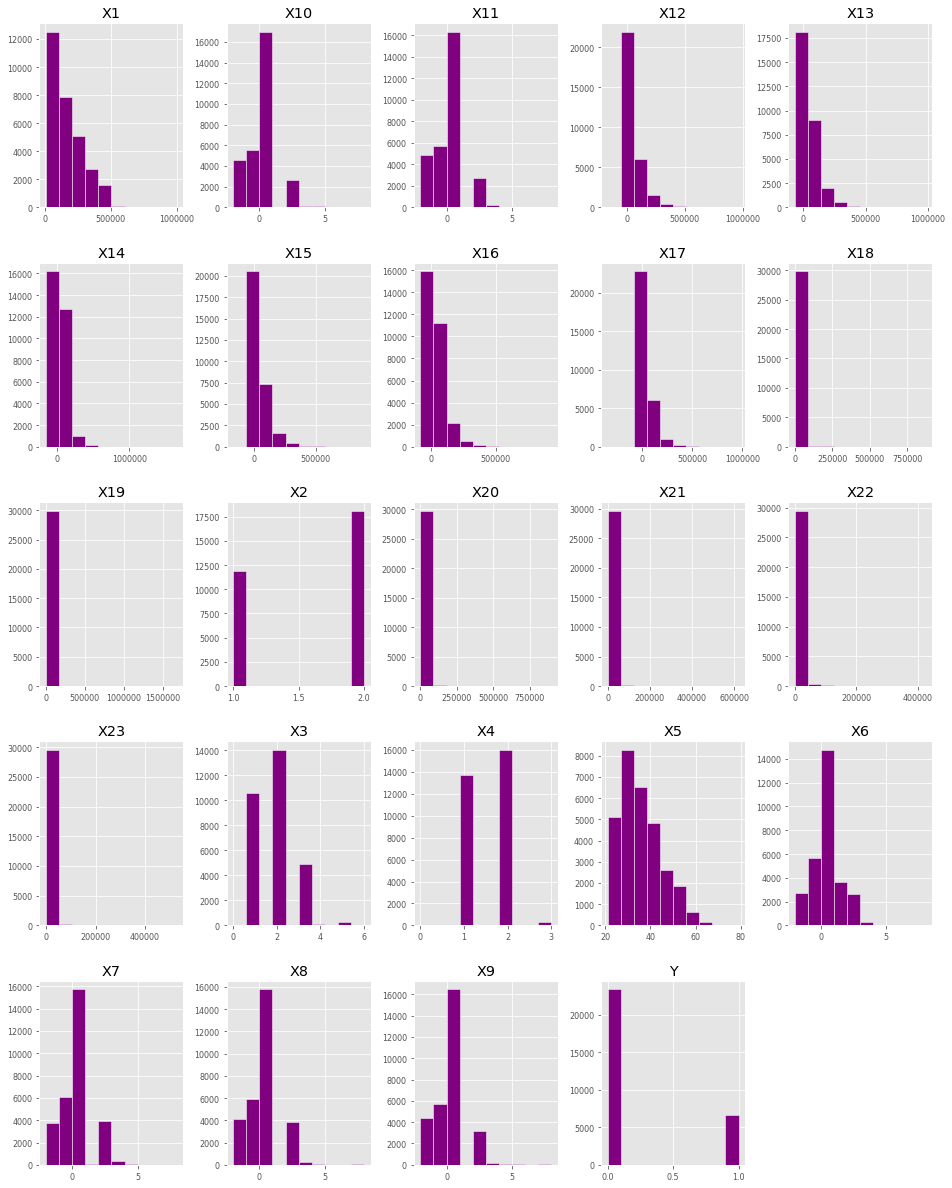

In [6]:
#Visualizing raw data through histograms and box plots 
df.hist(edgecolor = 'white', figsize=(16, 21), xlabelsize=8, ylabelsize=8, color="purple")

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31ce4c6940>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31ce4c6fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31ce4c66a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31ce4d16a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31ce4d19e8>],
 'means': []}

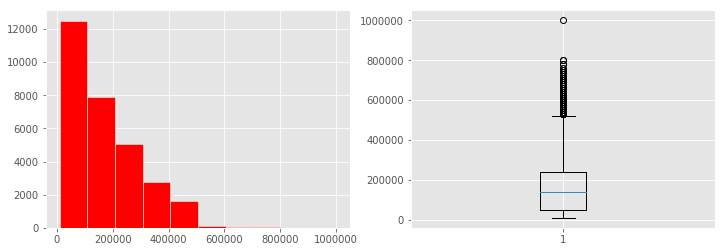

In [7]:
# Histogram & Box Plot to look at Central Tendancy for each column
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df['X1'], color="red", edgecolor = 'white')
ax2.boxplot(df['X1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31ce40c630>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31ce40ccc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31ce40c390>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31ce418390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31ce4186d8>],
 'means': []}

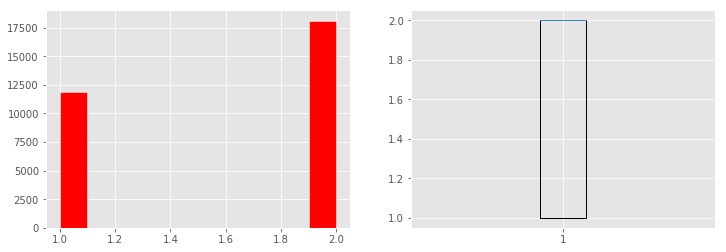

In [8]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df['X2'], color="red", edgecolor = 'white')
ax2.boxplot(df['X2'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31ce334898>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31ce334f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31ce3345f8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31ce33f5f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31ce33f940>],
 'means': []}

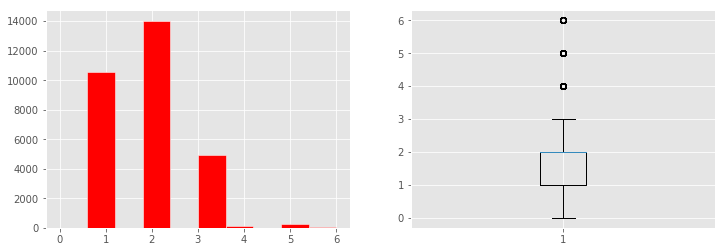

In [9]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df['X3'], color="red", edgecolor = 'white')
ax2.boxplot(df['X3'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31ce27e710>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31ce27eda0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31ce27e470>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31ce28c470>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31ce28c7b8>],
 'means': []}

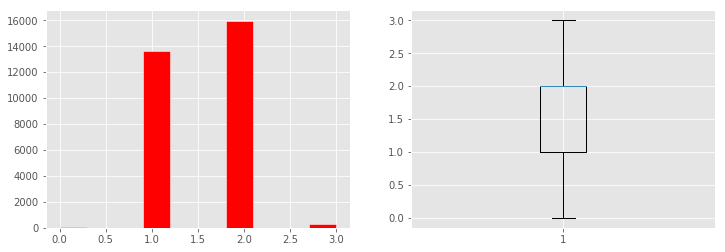

In [10]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df['X4'], color="red", edgecolor = 'white')
ax2.boxplot(df['X4'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31ce1c6dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31ce1d04a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31ce1c6b38>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31ce1d0b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31ce1d0e80>],
 'means': []}

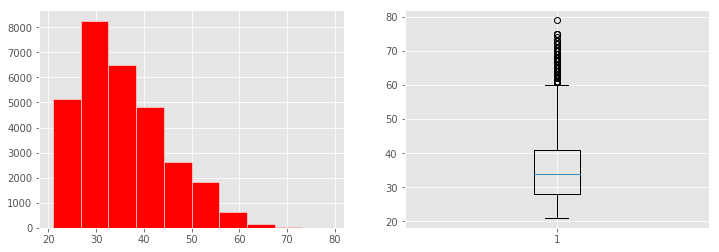

In [11]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df['X5'], color="red", edgecolor = 'white')
ax2.boxplot(df['X5'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31cdbd3438>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31cdbd3ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31cdbd3198>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31cdbdd198>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31cdbdd4e0>],
 'means': []}

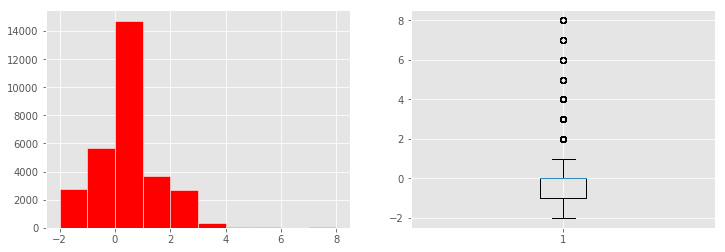

In [12]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df['X6'], color="red", edgecolor = 'white')
ax2.boxplot(df['X6'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31cdb14908>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31cdb14f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31cdb14668>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31cdb1d668>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31cdb1d9b0>],
 'means': []}

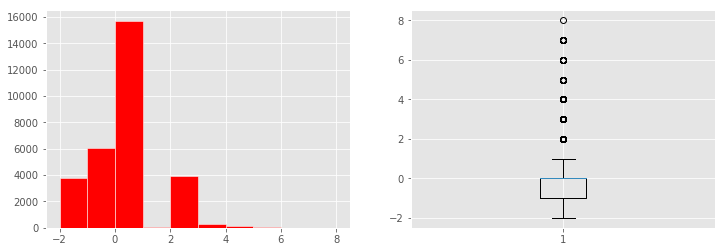

In [13]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df['X7'], color="red", edgecolor = 'white')
ax2.boxplot(df['X7'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31cda651d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31cda65860>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31cda65080>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31cda65ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31cd9ef278>],
 'means': []}

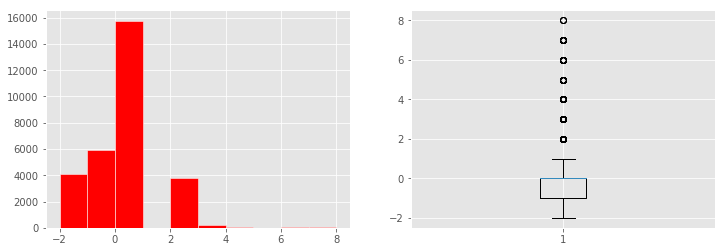

In [14]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df['X8'], color="red", edgecolor = 'white')
ax2.boxplot(df['X8'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31cd92bb38>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31cd934208>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31cd92b898>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31cd934898>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31cd934be0>],
 'means': []}

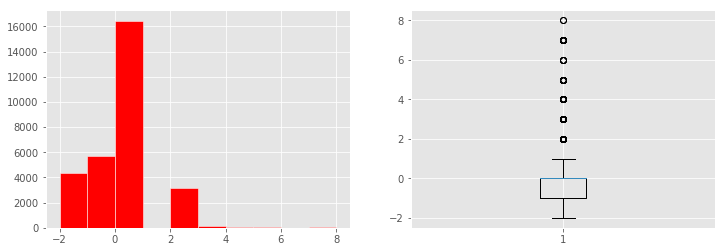

In [15]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df['X9'], color="red", edgecolor = 'white')
ax2.boxplot(df['X9'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31cd8774a8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31cd877b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31cd877208>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31cd883208>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31cd883550>],
 'means': []}

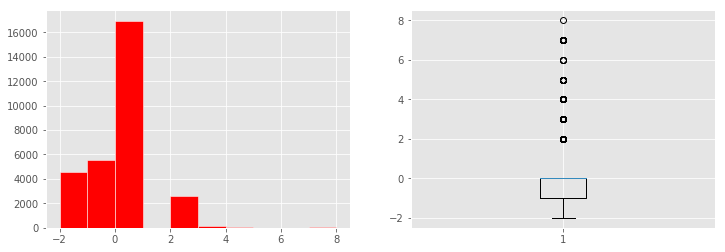

In [16]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df['X10'], color="red", edgecolor = 'white')
ax2.boxplot(df['X10'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31cd7c0e48>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31cd7c9518>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31cd7c0ba8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31cd7c9ba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31cd7c9ef0>],
 'means': []}

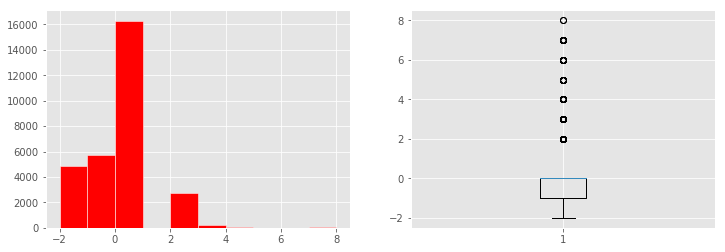

In [17]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df['X11'], color="red", edgecolor = 'white')
ax2.boxplot(df['X11'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31cd70c978>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31cd716048>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31cd70c6d8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31cd7166d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31cd716a20>],
 'means': []}

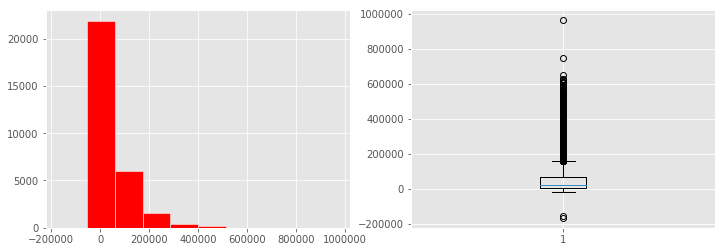

In [18]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df['X12'], color="red", edgecolor = 'white')
ax2.boxplot(df['X12'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31cd6547b8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31cd654e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31cd654518>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31cd65b518>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31cd65b860>],
 'means': []}

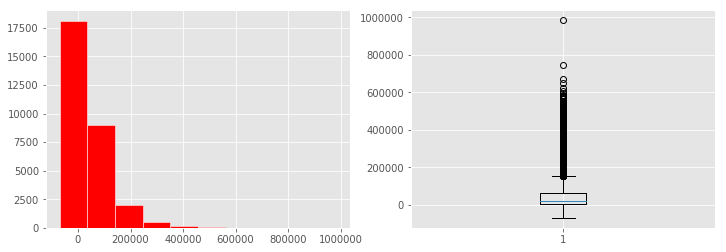

In [19]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df['X13'], color="red", edgecolor = 'white')
ax2.boxplot(df['X13'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31ccd6ad68>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31ccd76438>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31ccd6aac8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31ccd76ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31ccd76e10>],
 'means': []}

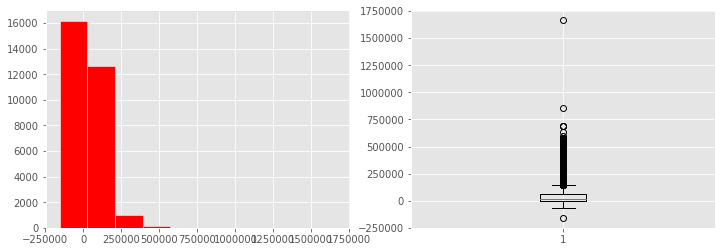

In [20]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df['X14'], color="red", edgecolor = 'white')
ax2.boxplot(df['X14'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31ccc48400>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31ccc48a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31ccc48160>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31ccc51160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31ccc514a8>],
 'means': []}

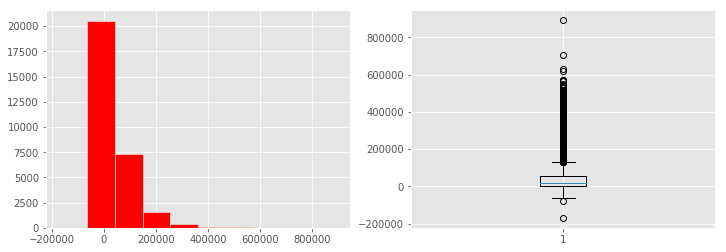

In [21]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df['X15'], color="red", edgecolor = 'white')
ax2.boxplot(df['X15'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31ccb88ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31ccb935c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31ccb88c50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31ccb93c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31ccb93f98>],
 'means': []}

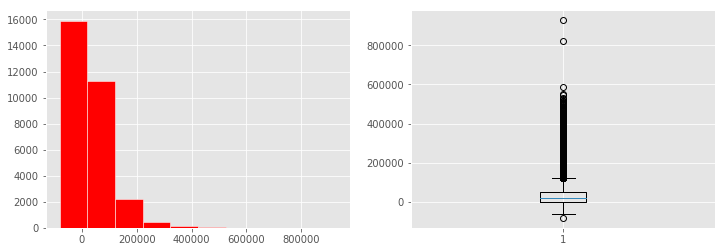

In [22]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df['X16'], color="red", edgecolor = 'white')
ax2.boxplot(df['X16'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31ccaccef0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31ccad75c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31ccaccc50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31ccad7c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31ccad7f98>],
 'means': []}

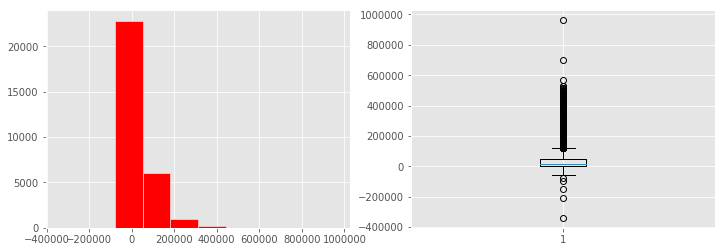

In [23]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df['X17'], color="red", edgecolor = 'white')
ax2.boxplot(df['X17'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31cca159e8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31cca200b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31cca15748>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31cca20748>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31cca20a90>],
 'means': []}

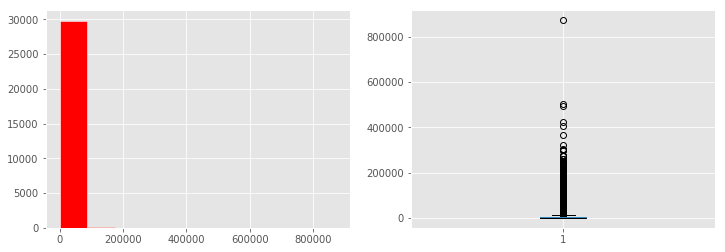

In [24]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df['X18'], color="red", edgecolor = 'white')
ax2.boxplot(df['X18'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31cc950e80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31cc95b550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31cc950be0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31cc95bbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31cc95bf28>],
 'means': []}

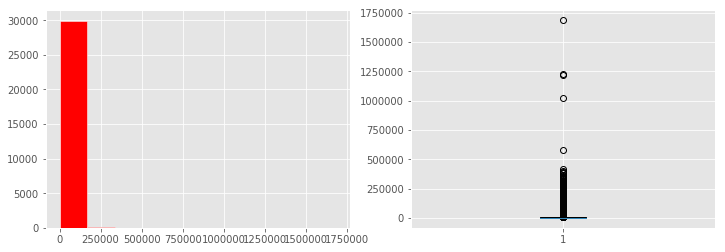

In [25]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df['X19'], color="red", edgecolor = 'white')
ax2.boxplot(df['X19'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31cc8a35f8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31cc8a3c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31cc8a3358>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31cc8ad358>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31cc8ad6a0>],
 'means': []}

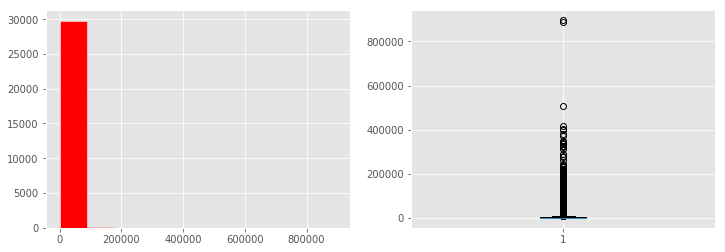

In [26]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df['X20'], color="red", edgecolor = 'white')
ax2.boxplot(df['X20'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31cc7dcc88>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31cc7e7358>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31cc7dc9e8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31cc7e79e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31cc7e7d30>],
 'means': []}

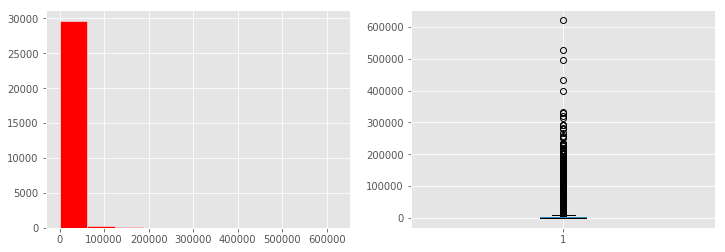

In [27]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df['X21'], color="red", edgecolor = 'white')
ax2.boxplot(df['X21'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31cc7256a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31cc725d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31cc725400>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31cc730400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31cc730748>],
 'means': []}

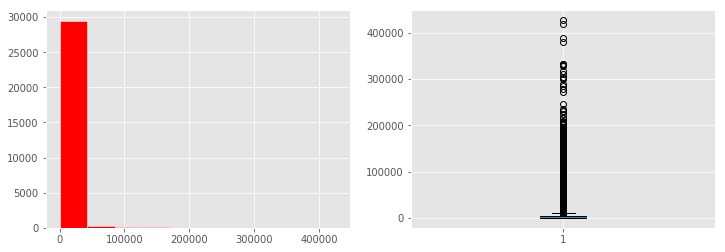

In [28]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df['X22'], color="red", edgecolor = 'white')
ax2.boxplot(df['X22'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31cc65db38>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31cc669208>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31cc65d898>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31cc669898>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31cc669be0>],
 'means': []}

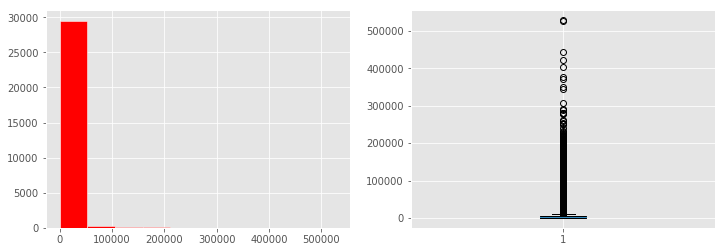

In [29]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df['X23'], color="red", edgecolor = 'white')
ax2.boxplot(df['X23'])

# **Understanding Raw Data** -JH

The Raw Dataset was run through a Logistic Regression and Decision Tree to understand what we were starting with. That can be found in:  [RawData](./RawData.ipynb). 

The logistic regression provided us with: 

1. Accuracy: 0.6485333333333333
2. F1_Score: 0.6794693790243869
3. AUC: 0.6522520746398724

The decision tree provided us with: 
1. Accuracy: 0.7274666666666667
2. F1_Score: 0.7299311624705724
3. AUC: 0.6022903361360605

# Main Pipelines

**Option 1:** (Odd-Numbered Pipelines) 

Handle Skew, Outliers & Normalization using Standard Scaler 

**Option 2:** (Even-Numbered Pipelines) 

Fixed Outliers, Normalization using MinMax Scaler & Skew

**Binning**
1. Age Binning 
2. Marriage Status Binning 
3. Education Level Binning 
4. History of Past Payment (X6-X11) - Yes or No if they had payment due

For attributes X6-X11, we are going to make assumptions about the data since -2 and 0 are not defined. Therefore, We are grouping -2 with the -1s and 0s with the 1s.
5. Amount of Bill Payment (X12-X17) - Feature Engineering 

Whether or not payment is due, whether or not amount was zero, month attributed with that column
6. Amount of Previous Payment (X18-X23) - Yes or No if they had payment due 

# **Data Processing** -JH

In [33]:
# checking for null values 
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [34]:
# Separating Target from rest of data 
target = df.iloc[:, -1:]
target.head()

# Taking target out of main dataframe 
df = df.iloc[:, :-1]

In [35]:
#Investing target data
target.head()

,Y
0,1
1,1
2,0
3,0
4,0


# **Binning and Feature Engineering of the Variables** -JH

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: X5, dtype: float64

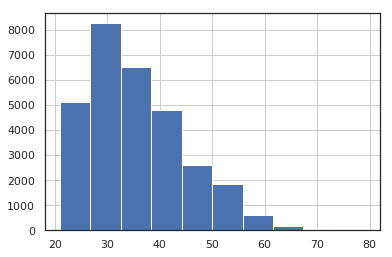

In [36]:
# Distribution of Age in the Dataset 
df['X5'].hist()
df['X5'].describe()

In [37]:
# Trying to create bins out of the age variable using qcut 
pd.qcut(df['X5'], 3)
# Creating 3 equal height bins for Age 

0        (20.999, 30.0]
1        (20.999, 30.0]
2          (30.0, 39.0]
3          (30.0, 39.0]
4          (39.0, 79.0]
5          (30.0, 39.0]
6        (20.999, 30.0]
7        (20.999, 30.0]
8        (20.999, 30.0]
9          (30.0, 39.0]
10         (30.0, 39.0]
11         (39.0, 79.0]
12         (39.0, 79.0]
13       (20.999, 30.0]
14       (20.999, 30.0]
15       (20.999, 30.0]
16       (20.999, 30.0]
17         (39.0, 79.0]
18         (39.0, 79.0]
19       (20.999, 30.0]
20         (30.0, 39.0]
21         (30.0, 39.0]
22       (20.999, 30.0]
23         (39.0, 79.0]
24       (20.999, 30.0]
25       (20.999, 30.0]
26       (20.999, 30.0]
27       (20.999, 30.0]
28         (39.0, 79.0]
29       (20.999, 30.0]
              ...      
29970      (30.0, 39.0]
29971      (30.0, 39.0]
29972      (30.0, 39.0]
29973      (30.0, 39.0]
29974      (30.0, 39.0]
29975      (39.0, 79.0]
29976      (39.0, 79.0]
29977      (30.0, 39.0]
29978      (30.0, 39.0]
29979      (30.0, 39.0]
29980      (39.0

In [38]:
#Defining a Function to bin Age
def binning(X5):
    if X5 > 20 and X5 <= 30:                
        return(0)
    if X5 > 30 and X5 <= 39:        
        return(1)
    if X5 > 39:      
        return(2)
df['X5_Bins'] = df['X5'].apply(binning)
df.head(15)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X5_Bins
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,2
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,1
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,1


In [39]:
#Dropping original X5
df = df.drop(['X5'], axis=1)

In [40]:
# Binning X6-X10, Easier to understand if a customer has a payment or not
df['X6_BI']= np.where(df['X6']>0 ,1,0)
df['X7_BI']= np.where(df['X7']>0 ,1,0)
df['X8_BI']= np.where(df['X8']>0 ,1,0)
df['X9_BI']= np.where(df['X9']>0 ,1,0)
df['X10_BI']= np.where(df['X10']>0 ,1,0)
df['X11_BI']= np.where(df['X11']>0 ,1,0)
df.head()

,X1,X2,X3,X4,X6,X7,X8,X9,X10,X11,...,X21,X22,X23,X5_Bins,X6_BI,X7_BI,X8_BI,X9_BI,X10_BI,X11_BI
0,20000,2,2,1,2,2,-1,-1,-2,-2,...,0,0,0,0,1,1,0,0,0,0
1,120000,2,2,2,-1,2,0,0,0,2,...,1000,0,2000,0,0,1,0,0,0,1
2,90000,2,2,2,0,0,0,0,0,0,...,1000,1000,5000,1,0,0,0,0,0,0
3,50000,2,2,1,0,0,0,0,0,0,...,1100,1069,1000,1,0,0,0,0,0,0
4,50000,1,2,1,-1,0,-1,0,0,0,...,9000,689,679,2,0,0,0,0,0,0


In [41]:
# Dropping Original Variables
df = df.drop(['X6', 'X7', 'X8', 'X10', 'X11', 'X9'], axis=1)

In [42]:
# Binning X12-X17 as part of Feauture Engineering, breaking down all the parts of this data. 
# First seeing if customer had a bill payment 
df['X12_BI']= np.where(df['X12']>0 ,1,0)
df['X13_BI']= np.where(df['X13']>0 ,1,0)
df['X14_BI']= np.where(df['X14']>0 ,1,0)
df['X15_BI']= np.where(df['X15']>0 ,1,0)
df['X16_BI']= np.where(df['X16']>0 ,1,0)
df['X17_BI']= np.where(df['X17']>0 ,1,0)
df.head(5)

,X1,X2,X3,X4,X12,X13,X14,X15,X16,X17,...,X8_BI,X9_BI,X10_BI,X11_BI,X12_BI,X13_BI,X14_BI,X15_BI,X16_BI,X17_BI
0,20000,2,2,1,3913,3102,689,0,0,0,...,0,0,0,0,1,1,1,0,0,0
1,120000,2,2,2,2682,1725,2682,3272,3455,3261,...,0,0,0,1,1,1,1,1,1,1
2,90000,2,2,2,29239,14027,13559,14331,14948,15549,...,0,0,0,0,1,1,1,1,1,1
3,50000,2,2,1,46990,48233,49291,28314,28959,29547,...,0,0,0,0,1,1,1,1,1,1
4,50000,1,2,1,8617,5670,35835,20940,19146,19131,...,0,0,0,0,1,1,1,1,1,1


In [43]:
# Creating absolute value of the payment 
df['X12_ABS'] = abs(df['X12'])
df['X13_ABS'] = abs(df['X13'])
df['X14_ABS'] = abs(df['X14'])
df['X15_ABS'] = abs(df['X15'])
df['X16_ABS'] = abs(df['X16'])
df['X17_ABS'] = abs(df['X17'])
df.head(5)

,X1,X2,X3,X4,X12,X13,X14,X15,X16,X17,...,X14_BI,X15_BI,X16_BI,X17_BI,X12_ABS,X13_ABS,X14_ABS,X15_ABS,X16_ABS,X17_ABS
0,20000,2,2,1,3913,3102,689,0,0,0,...,1,0,0,0,3913,3102,689,0,0,0
1,120000,2,2,2,2682,1725,2682,3272,3455,3261,...,1,1,1,1,2682,1725,2682,3272,3455,3261
2,90000,2,2,2,29239,14027,13559,14331,14948,15549,...,1,1,1,1,29239,14027,13559,14331,14948,15549
3,50000,2,2,1,46990,48233,49291,28314,28959,29547,...,1,1,1,1,46990,48233,49291,28314,28959,29547
4,50000,1,2,1,8617,5670,35835,20940,19146,19131,...,1,1,1,1,8617,5670,35835,20940,19146,19131


In [44]:
# Creating a countdown of the months as the last attribute of the X12-X17
df['X12_M']= np.where(df['X12'].isnull(),6,6)
df['X13_M']= np.where(df['X13'].isnull(),5,5)
df['X14_M']= np.where(df['X14'].isnull(),4,4)
df['X15_M']= np.where(df['X15'].isnull(),3,3)
df['X16_M']= np.where(df['X16'].isnull(),2,2)
df['X17_M']= np.where(df['X17'].isnull(),1,1)
df.head()

,X1,X2,X3,X4,X12,X13,X14,X15,X16,X17,...,X14_ABS,X15_ABS,X16_ABS,X17_ABS,X12_M,X13_M,X14_M,X15_M,X16_M,X17_M
0,20000,2,2,1,3913,3102,689,0,0,0,...,689,0,0,0,6,5,4,3,2,1
1,120000,2,2,2,2682,1725,2682,3272,3455,3261,...,2682,3272,3455,3261,6,5,4,3,2,1
2,90000,2,2,2,29239,14027,13559,14331,14948,15549,...,13559,14331,14948,15549,6,5,4,3,2,1
3,50000,2,2,1,46990,48233,49291,28314,28959,29547,...,49291,28314,28959,29547,6,5,4,3,2,1
4,50000,1,2,1,8617,5670,35835,20940,19146,19131,...,35835,20940,19146,19131,6,5,4,3,2,1


In [45]:
# Dropping original variables 
df = df.drop(['X12', 'X13', 'X14', 'X15', 'X16', 'X17'], axis=1)

In [46]:
# Binning variables X18-X23 to show if they had a payment or not 
df['X18_BI']= np.where(df['X18']>0 ,1,0)
df['X19_BI']= np.where(df['X19']>0 ,1,0)
df['X20_BI']= np.where(df['X20']>0 ,1,0)
df['X21_BI']= np.where(df['X21']>0 ,1,0)
df['X22_BI']= np.where(df['X22']>0 ,1,0)
df['X23_BI']= np.where(df['X23']>0 ,1,0)
df.head(5)

,X1,X2,X3,X4,X18,X19,X20,X21,X22,X23,...,X14_M,X15_M,X16_M,X17_M,X18_BI,X19_BI,X20_BI,X21_BI,X22_BI,X23_BI
0,20000,2,2,1,0,689,0,0,0,0,...,4,3,2,1,0,1,0,0,0,0
1,120000,2,2,2,0,1000,1000,1000,0,2000,...,4,3,2,1,0,1,1,1,0,1
2,90000,2,2,2,1518,1500,1000,1000,1000,5000,...,4,3,2,1,1,1,1,1,1,1
3,50000,2,2,1,2000,2019,1200,1100,1069,1000,...,4,3,2,1,1,1,1,1,1,1
4,50000,1,2,1,2000,36681,10000,9000,689,679,...,4,3,2,1,1,1,1,1,1,1


In [47]:
# Dropping original variables
df = df.drop(['X18', 'X19', 'X20', 'X21', 'X22', 'X23'], axis=1)

# **Skew** -JH

In [48]:
# Checking Skew of Data 
df.skew()
# Goal to get Skew of data between [-0.5, 0.5]

X1         0.992867
X2        -0.424183
X3         0.970972
X4        -0.018742
X5_Bins    0.115017
X6_BI      1.301689
X7_BI      1.983384
X8_BI      2.069933
X9_BI      2.383292
X10_BI     2.686696
X11_BI     2.618870
X12_BI    -2.939901
X13_BI    -2.562779
X14_BI    -2.375783
X15_BI    -2.213715
X16_BI    -2.090760
X17_BI    -1.886434
X12_ABS    2.667725
X13_ABS    2.708496
X14_ABS    3.093013
X15_ABS    2.828133
X16_ABS    2.881514
X17_ABS    2.872948
X12_M      0.000000
X13_M      0.000000
X14_M      0.000000
X15_M      0.000000
X16_M      0.000000
X17_M      0.000000
X18_BI    -1.711064
X19_BI    -1.667113
X20_BI    -1.508434
X21_BI    -1.397663
X22_BI    -1.327970
X23_BI    -1.223411
dtype: float64

-0.5134595917536328

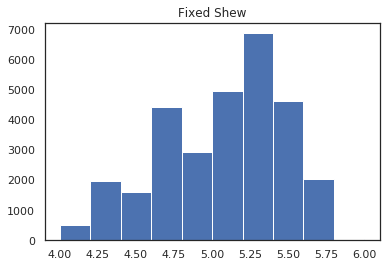

In [49]:
df['X1'] = np.log10(df['X1'])
plt.hist(df['X1'])
plt.title("Fixed Shew")
df['X1'].skew()

0.27374698076891496

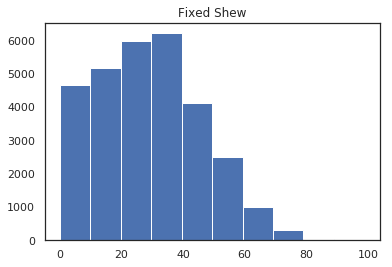

In [50]:
df['X12_ABS'] = np.cbrt(df['X12_ABS'])
plt.hist(df['X12_ABS'])
plt.title("Fixed Shew")
df['X12_ABS'].skew()

0.24408719608956556

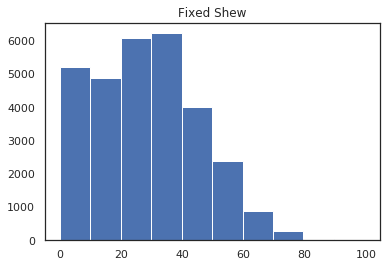

In [51]:
df['X13_ABS'] = np.cbrt(df['X13_ABS'])
plt.hist(df['X13_ABS'])
plt.title("Fixed Shew")
df['X13_ABS'].skew()

0.2430896950960733

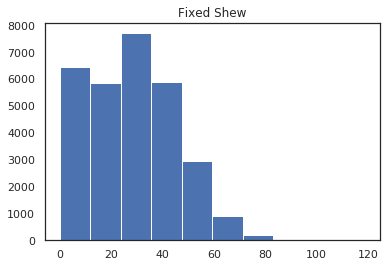

In [52]:
df['X14_ABS'] = np.cbrt(df['X14_ABS'])
plt.hist(df['X14_ABS'])
plt.title("Fixed Shew")
df['X14_ABS'].skew()

0.24825485958557886

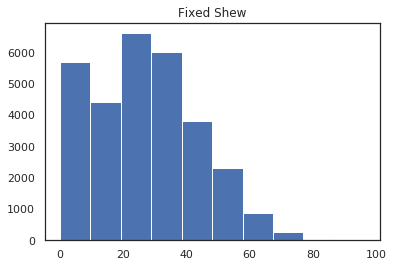

In [53]:
df['X15_ABS'] = np.cbrt(df['X15_ABS'])
plt.hist(df['X15_ABS'])
plt.title("Fixed Shew")
df['X15_ABS'].skew()

0.2622261458854033

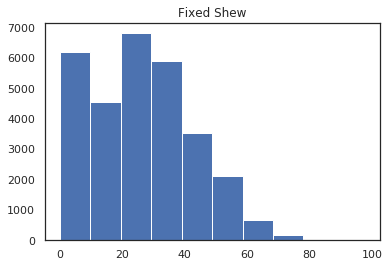

In [54]:
df['X16_ABS'] = np.cbrt(df['X16_ABS'])
plt.hist(df['X16_ABS'])
plt.title("Fixed Shew")
df['X16_ABS'].skew()

0.2725666865305751

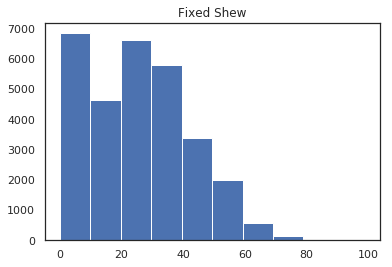

In [55]:
df['X17_ABS'] = np.cbrt(df['X17_ABS'])
plt.hist(df['X17_ABS'])
plt.title("Fixed Shew")
df['X17_ABS'].skew()

In [56]:
df.skew()

X1        -0.513460
X2        -0.424183
X3         0.970972
X4        -0.018742
X5_Bins    0.115017
X6_BI      1.301689
X7_BI      1.983384
X8_BI      2.069933
X9_BI      2.383292
X10_BI     2.686696
X11_BI     2.618870
X12_BI    -2.939901
X13_BI    -2.562779
X14_BI    -2.375783
X15_BI    -2.213715
X16_BI    -2.090760
X17_BI    -1.886434
X12_ABS    0.273747
X13_ABS    0.244087
X14_ABS    0.243090
X15_ABS    0.248255
X16_ABS    0.262226
X17_ABS    0.272567
X12_M      0.000000
X13_M      0.000000
X14_M      0.000000
X15_M      0.000000
X16_M      0.000000
X17_M      0.000000
X18_BI    -1.711064
X19_BI    -1.667113
X20_BI    -1.508434
X21_BI    -1.397663
X22_BI    -1.327970
X23_BI    -1.223411
dtype: float64

# **Outliers** -JH

In [57]:
# Replacing Outliers in the data by replacing numbers more than 3 Standard Deviations away from the Mean 
def sd_outlier_replace(x): 
    if x > (mean + (3*SD)): 
        x = median
    # If a values is greater than the mean plus three times the standard deviation
    # This value is then replaced by the median of the columns
    elif x < (mean - (3*SD)): 
        x = median
    # If a values is less than the mean minus three times the standard deviation
    # This value is then replaced by the median of the columns
    else: 
        pass
    # Otherwise, leave the value as is 
    return(x)

Text(0.5, 1.0, 'Fixed Outliers')

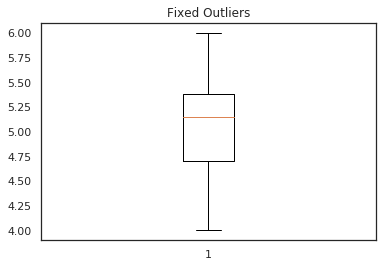

In [58]:
# Applying function to columns with outliers 
mean = df['X1'].mean()
SD = df['X1'].std()
median = df['X1'].median()
df['X1'] = df['X1'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X1'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

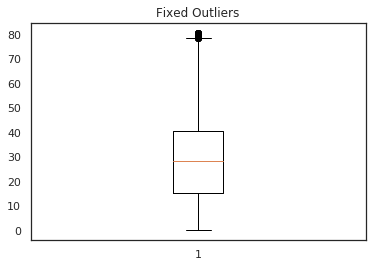

In [59]:
# Applying function to columns with outliers 
mean = df['X12_ABS'].mean()
SD = df['X12_ABS'].std()
median = df['X12_ABS'].median()
df['X12_ABS'] = df['X12_ABS'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X12_ABS'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

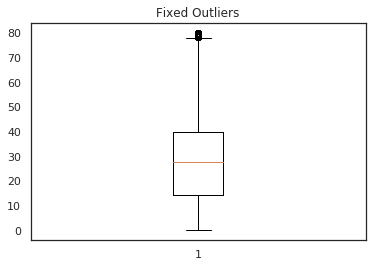

In [60]:
# Applying function to columns with outliers 
mean = df['X13_ABS'].mean()
SD = df['X13_ABS'].std()
median = df['X13_ABS'].median()
df['X13_ABS'] = df['X13_ABS'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X13_ABS'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

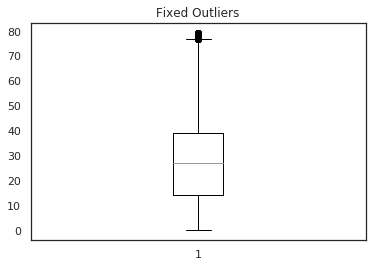

In [61]:
# Applying function to columns with outliers 
mean = df['X14_ABS'].mean()
SD = df['X14_ABS'].std()
median = df['X14_ABS'].median()
df['X14_ABS'] = df['X14_ABS'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X14_ABS'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

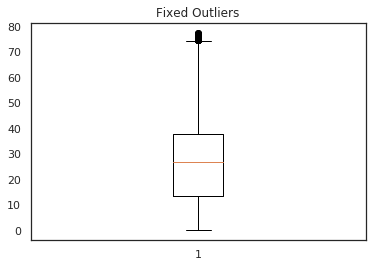

In [62]:
# Applying function to columns with outliers 
mean = df['X15_ABS'].mean()
SD = df['X15_ABS'].std()
median = df['X15_ABS'].median()
df['X15_ABS'] = df['X15_ABS'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X15_ABS'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

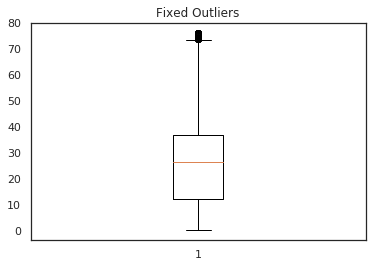

In [63]:
# Applying function to columns with outliers 
mean = df['X16_ABS'].mean()
SD = df['X16_ABS'].std()
median = df['X16_ABS'].median()
df['X16_ABS'] = df['X16_ABS'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X16_ABS'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

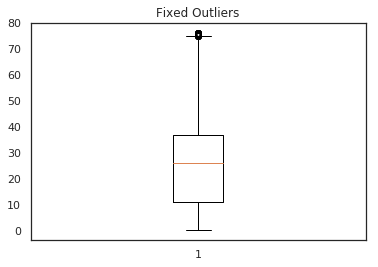

In [64]:
# Applying function to columns with outliers 
mean = df['X17_ABS'].mean()
SD = df['X17_ABS'].std()
median = df['X17_ABS'].median()
df['X17_ABS'] = df['X17_ABS'].apply(lambda x: sd_outlier_replace(x))

# Checking with Boxplot 
plt.boxplot(df['X17_ABS'])
plt.title("Fixed Outliers")

In [65]:
# Filtering out variables that do not have to be normalized 
dfnorm = df.filter(['X1', "X12_ABS", "X13_ABS", "X14_ABS", "X15_ABS", "X16_ABS", "X17_ABS"], axis=1)

df = df.drop(["X1", 'X12_ABS', 'X13_ABS', 'X14_ABS', 'X15_ABS', 'X16_ABS', 'X17_ABS'], axis=1)

In [66]:
# Normalizing using Standard Scaler function 
# Column Names 
cols = dfnorm.columns

# Scaler function from Preprocessing 
scaler = preprocessing.StandardScaler()

# Transforming norm_df
dfnorm = scaler.fit_transform(dfnorm)

# Making DataFrame from Standardized data 
# Using column names defined earlier 
dfnorm = pd.DataFrame(dfnorm, columns=cols)

In [67]:
# Concating the normalized data with the data that did not have to be normalized 
df = pd.concat([dfnorm,df], axis=1)
df.head()

,X1,X12_ABS,X13_ABS,X14_ABS,X15_ABS,X16_ABS,X17_ABS,X2,X3,X4,...,X14_M,X15_M,X16_M,X17_M,X18_BI,X19_BI,X20_BI,X21_BI,X22_BI,X23_BI
0,-1.869598,-0.758386,-0.785153,-1.088616,-1.579920,-1.541281,-1.483532,2,2,1,...,4,3,2,1,0,1,0,0,0,0
1,0.034263,-0.866772,-0.935035,-0.794573,-0.699341,-0.636680,-0.606347,2,2,2,...,4,3,2,1,0,1,1,1,0,1
2,-0.271418,0.116536,-0.233725,-0.216424,-0.139167,-0.067265,-0.007117,2,2,2,...,4,3,2,1,1,1,1,1,1,1
3,-0.895980,0.423406,0.476861,0.528327,0.227939,0.296254,0.345181,2,2,1,...,4,3,2,1,1,1,1,1,1,1
4,-0.895980,-0.482617,-0.597292,0.313576,0.054974,0.059507,0.098518,1,2,1,...,4,3,2,1,1,1,1,1,1,1


In [68]:
# Checking mean for standardized 
# Want to see mean very close to 0 
df.mean()

X1         1.068575e-15
X12_ABS   -2.496151e-17
X13_ABS   -2.206994e-16
X14_ABS   -2.675897e-16
X15_ABS    1.103393e-15
X16_ABS   -7.092475e-18
X17_ABS   -8.101461e-16
X2         1.603733e+00
X3         1.853133e+00
X4         1.551867e+00
X5_Bins    9.377000e-01
X6_BI      2.272667e-01
X7_BI      1.479333e-01
X8_BI      1.404333e-01
X9_BI      1.170000e-01
X10_BI     9.893333e-02
X11_BI     1.026333e-01
X12_BI     9.134000e-01
X13_BI     8.941667e-01
X14_BI     8.825000e-01
X15_BI     8.710000e-01
X16_BI     8.613000e-01
X17_BI     8.430667e-01
X12_M      6.000000e+00
X13_M      5.000000e+00
X14_M      4.000000e+00
X15_M      3.000000e+00
X16_M      2.000000e+00
X17_M      1.000000e+00
X18_BI     8.250333e-01
X19_BI     8.201333e-01
X20_BI     8.010667e-01
X21_BI     7.864000e-01
X22_BI     7.765667e-01
X23_BI     7.609000e-01
dtype: float64

In [69]:
# Checking standard deviation of standardized data
# Want std dev of each column close to 1 
df.std()

X1         1.000017
X12_ABS    1.000017
X13_ABS    1.000017
X14_ABS    1.000017
X15_ABS    1.000017
X16_ABS    1.000017
X17_ABS    1.000017
X2         0.489129
X3         0.790349
X4         0.521970
X5_Bins    0.817338
X6_BI      0.419073
X7_BI      0.355040
X8_BI      0.347442
X9_BI      0.321426
X10_BI     0.298577
X11_BI     0.303484
X12_BI     0.281253
X13_BI     0.307629
X14_BI     0.322021
X15_BI     0.335206
X16_BI     0.345639
X17_BI     0.363744
X12_M      0.000000
X13_M      0.000000
X14_M      0.000000
X15_M      0.000000
X16_M      0.000000
X17_M      0.000000
X18_BI     0.379945
X19_BI     0.384083
X20_BI     0.399204
X21_BI     0.409854
X22_BI     0.416553
X23_BI     0.426541
dtype: float64

In [70]:
# Adding the Y target variable back into the main dataframe
df = pd.concat([df,target], axis=1)
df.tail()

,X1,X12_ABS,X13_ABS,X14_ABS,X15_ABS,X16_ABS,X17_ABS,X2,X3,X4,...,X15_M,X16_M,X17_M,X18_BI,X19_BI,X20_BI,X21_BI,X22_BI,X23_BI,Y
29995,0.678321,1.661553,1.713041,1.842375,1.058425,0.343225,0.006401,1,3,1,...,3,2,1,1,1,1,1,1,1,0
29996,0.271367,-0.982979,-0.921493,-0.719511,-0.347080,-0.505272,-1.483532,1,3,2,...,3,2,1,1,1,1,1,0,0,0
29997,-1.438765,-0.786392,-0.762728,-0.787020,0.053359,0.098567,0.104723,1,2,2,...,3,2,1,0,0,1,1,1,1,1
29998,-0.396570,-0.988224,0.846757,0.862328,0.644947,-0.176882,0.680220,1,3,1,...,3,2,1,1,1,1,1,1,1,1
29999,-0.895980,0.437288,0.486595,0.535119,0.388270,0.366877,-0.014625,1,2,1,...,3,2,1,1,1,1,1,1,1,1


In [71]:
# Exporting DataFrame as CSV 
df.to_csv('Final5', ',')

# **Modeling** -KS

# **Splitting and Resampling Data** -KS

In [72]:
# Importing Excel file, calling the DataFrame comp_df
df = pd.read_csv('Final5', header=0, index_col=0)
# Checking import 
df.head(5)

,X1,X12_ABS,X13_ABS,X14_ABS,X15_ABS,X16_ABS,X17_ABS,X2,X3,X4,...,X15_M,X16_M,X17_M,X18_BI,X19_BI,X20_BI,X21_BI,X22_BI,X23_BI,Y
0,-1.869598,-0.758386,-0.785153,-1.088616,-1.579920,-1.541281,-1.483532,2,2,1,...,3,2,1,0,1,0,0,0,0,1
1,0.034263,-0.866772,-0.935035,-0.794573,-0.699341,-0.636680,-0.606347,2,2,2,...,3,2,1,0,1,1,1,0,1,1
2,-0.271418,0.116536,-0.233725,-0.216424,-0.139167,-0.067265,-0.007117,2,2,2,...,3,2,1,1,1,1,1,1,1,0
3,-0.895980,0.423406,0.476861,0.528327,0.227939,0.296254,0.345181,2,2,1,...,3,2,1,1,1,1,1,1,1,0
4,-0.895980,-0.482617,-0.597292,0.313576,0.054974,0.059507,0.098518,1,2,1,...,3,2,1,1,1,1,1,1,1,0


In [73]:
# Separating the Features from the Target Variable
X = df.iloc[:,:-1] # Features
y = df.Y # Target variable

In [74]:
# Train/Test spilt on our data having test size be 25% of the main data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2019)

In [75]:
# Since the target variable is not 50/50 we are oversampling so that the target option (Churn, Yes or No) is even
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2019)
X_train_resample, y_train_resample = ros.fit_resample(X_train, y_train)

# **Logistic Regression** -KS

In [76]:
cols = df.columns.values
print(cols)

['X1' 'X12_ABS' 'X13_ABS' 'X14_ABS' 'X15_ABS' 'X16_ABS' 'X17_ABS' 'X2'
 'X3' 'X4' 'X5_Bins' 'X6_BI' 'X7_BI' 'X8_BI' 'X9_BI' 'X10_BI' 'X11_BI'
 'X12_BI' 'X13_BI' 'X14_BI' 'X15_BI' 'X16_BI' 'X17_BI' 'X12_M' 'X13_M'
 'X14_M' 'X15_M' 'X16_M' 'X17_M' 'X18_BI' 'X19_BI' 'X20_BI' 'X21_BI'
 'X22_BI' 'X23_BI' 'Y']


In [77]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear')

# fit the model with data
logreg = logreg.fit(X_train_resample,y_train_resample)

#
y_pred=logreg.predict(X_test)

In [78]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4734, 1172],
       [ 608,  986]])

Text(0.5, 257.44, 'Predicted label')

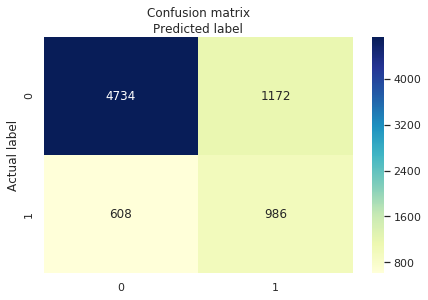

In [79]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [80]:
#Model Accuracy 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1_Score:",f1_score(y_test, y_pred, average='weighted'))
print("AUC:",roc_auc_score(y_test, y_pred))

Accuracy: 0.7626666666666667
F1_Score: 0.7745544063870851
AUC: 0.7100636870145879


# **Decision Tree** -KS

In [81]:
# Import Decision Tree Classifier  
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree Classifier Object 
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_resample, y_train_resample)

# Predict the response for test dataset 
y_pred = clf.predict(X_test)

# Model Accuracy 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1_Score:",f1_score(y_test, y_pred, average='weighted'))
print("AUC:",roc_auc_score(y_test, y_pred))

Accuracy: 0.7353333333333333
F1_Score: 0.7379784809258068
AUC: 0.6150718215658874


# **SVM Gaussian Kernel** -KS

In [84]:
#from sklearn.svm import SVC  
#svclassifier = SVC(kernel='rbf', gamma='auto')  #Kernel=rbf, non-linearly separable data
#svclassifier = svclassifier.fit(X_train_resample, y_train_resample) 

In [85]:
#y_pred = svclassifier.predict(X_test)  

In [86]:
#from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(y_test, y_pred))  
#print(classification_report(y_test, y_pred))

In [1]:
# Model Accuracy
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("F1_Score:",f1_score(y_test, y_pred, average='weighted'))
#print("AUC:",roc_auc_score(y_test, y_pred))

![alt text](SVM.png "Title")

# **K-Neighbors Classifier** -KS

In [88]:
from sklearn.neighbors import KNeighborsClassifier
kneigh = KNeighborsClassifier()
kneigh = kneigh.fit(X_train_resample, y_train_resample)
y_pred = kneigh.predict(X_test)

In [89]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1_Score:",f1_score(y_test, y_pred, average='weighted'))
print("AUC:",roc_auc_score(y_test, y_pred))

Accuracy: 0.6664
F1_Score: 0.6940704830304599
AUC: 0.650313506329399


# **ADA Classifier** -KS

In [90]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier(n_estimators=70, random_state=2019)
ADA = ADA.fit(X_train_resample, y_train_resample)
y_pred = ADA.predict(X_test)

In [91]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1_Score:",f1_score(y_test, y_pred, average='weighted'))
print("AUC:",roc_auc_score(y_test, y_pred))

Accuracy: 0.7622666666666666
F1_Score: 0.7742218312582383
AUC: 0.7098097080101855


# **Random Forest** -KS

![alt text](RF_1.png "Title")

In [92]:
#from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(n_estimators=100)

#clf.fit(X_train_resample, y_train_resample)

#y_pred = clf.predict(X_test)

In [93]:
# Model Accuracy
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("F1_Score:",f1_score(y_test, y_pred, average='weighted'))
#print("AUC:",roc_auc_score(y_test, y_pred))

# **Cross Validation Check** -JH

In [92]:
X = df.iloc[:,:-1] # Features
y = df.Y # Target variable

In [93]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2019)
X_resample, y_resample = ros.fit_resample(X, y)

In [96]:
# cross_valid_ex.py

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier


features, targets = X_resample, y_resample

models = []
models.append(('LogisticRegression', LogisticRegression(solver='liblinear')))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
#models.append(('SVC', SVC(kernel='rbf', gamma='auto')))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('AdaClassifier', AdaBoostClassifier()))
#models.append(('RandomForest', RandomForestClassifier(n_estimators=100)))


# KFold with 'stratify' option
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=2019)
for name, model in models:
    score = cross_val_score(model, features, targets, cv=cv, scoring='roc_auc')
    print("Model:{0}, Score: AUC={1:0.5f}, var={2:0.5f}".format(
        name,
        score.mean(),
        score.var()
        )
    )
cv1 = StratifiedKFold(n_splits=10, shuffle=True, random_state=2019)
for name, model in models:
    score = cross_val_score(model, features, targets, cv=cv1, scoring='f1')
    print("Model:{0}, Score: F1={1:0.5f}, var={2:0.5f}".format(
        name,
        score.mean(),
        score.var()
        )
    )    


Model:LogisticRegression, Score: AUC=0.75961, var=0.00004
Model:KNeighborsClassifier, Score: AUC=0.84679, var=0.00010
Model:DecisionTreeClassifier, Score: AUC=0.89187, var=0.00012
Model:AdaClassifier, Score: AUC=0.76772, var=0.00006
Model:LogisticRegression, Score: F1=0.67055, var=0.00006
Model:KNeighborsClassifier, Score: F1=0.78503, var=0.00008
Model:DecisionTreeClassifier, Score: F1=0.89798, var=0.00013
Model:AdaClassifier, Score: F1=0.67785, var=0.00008


![alt text](CV_1.png "Title")

# **Best Repeatability Awards Goes To...** -JH

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(n_estimators=100, max_depth=10 ,max_features=8)

#clf.fit(X_train_resample, y_train_resample)

#y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("F1_Score:",f1_score(y_test, y_pred, average='weighted'))
#print("AUC:",roc_auc_score(y_test, y_pred))

![alt text](RF_2.png "Title")

![alt text](CV_2.png "Title")

# **and Best Performance Award (According to TPOT) Goes To...** -JH

In [102]:
# **TPOT results** 
# Average CV score on the training set was:0.7567618699583566
# exported_pipeline = make_pipeline(
#    StackingEstimator(estimator=DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_leaf=20, min_samples_split=15)),
#    GaussianNB())

In [103]:
# **Best Performance**
# Create Decision Tree Classifier Object 
clf = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=20, min_samples_split=15)
clf = clf.fit(X_train_resample, y_train_resample)

# Predict the response for test dataset 
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1_Score:",f1_score(y_test, y_pred, average='weighted'))
print("AUC:",roc_auc_score(y_test, y_pred))

Accuracy: 0.7881333333333334
F1_Score: 0.7930991857202467
AUC: 0.7095154705186779


In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

features, targets = X_resample, y_resample
models = []
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=20, min_samples_split=15)))


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=2019)
for name, model in models:
    score = cross_val_score(model, features, targets, cv=cv, scoring='roc_auc')
    print("Model:{0}, Score: AUC={1:0.5f}, var={2:0.5f}".format(
        name,
        score.mean(),
        score.var()
        )
    )
cv1 = StratifiedKFold(n_splits=10, shuffle=True, random_state=2019)
for name, model in models:
    score = cross_val_score(model, features, targets, cv=cv1, scoring='f1')
    print("Model:{0}, Score: F1={1:0.5f}, var={2:0.5f}".format(
        name,
        score.mean(),
        score.var()
        )
    )    
cv2 = StratifiedKFold(n_splits=10, shuffle=True, random_state=2019)
for name, model in models:
    score = cross_val_score(model, features, targets, cv=cv2, scoring='accuracy')
    print("Model:{0}, Score: Accuracy={1:0.5f}, var={2:0.5f}".format(
        name,
        score.mean(),
        score.var()
        )
    )  

Model:DecisionTreeClassifier, Score: AUC=0.76749, var=0.00007
Model:DecisionTreeClassifier, Score: F1=0.67888, var=0.00011
Model:DecisionTreeClassifier, Score: Accuracy=0.70634, var=0.00003
